In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      

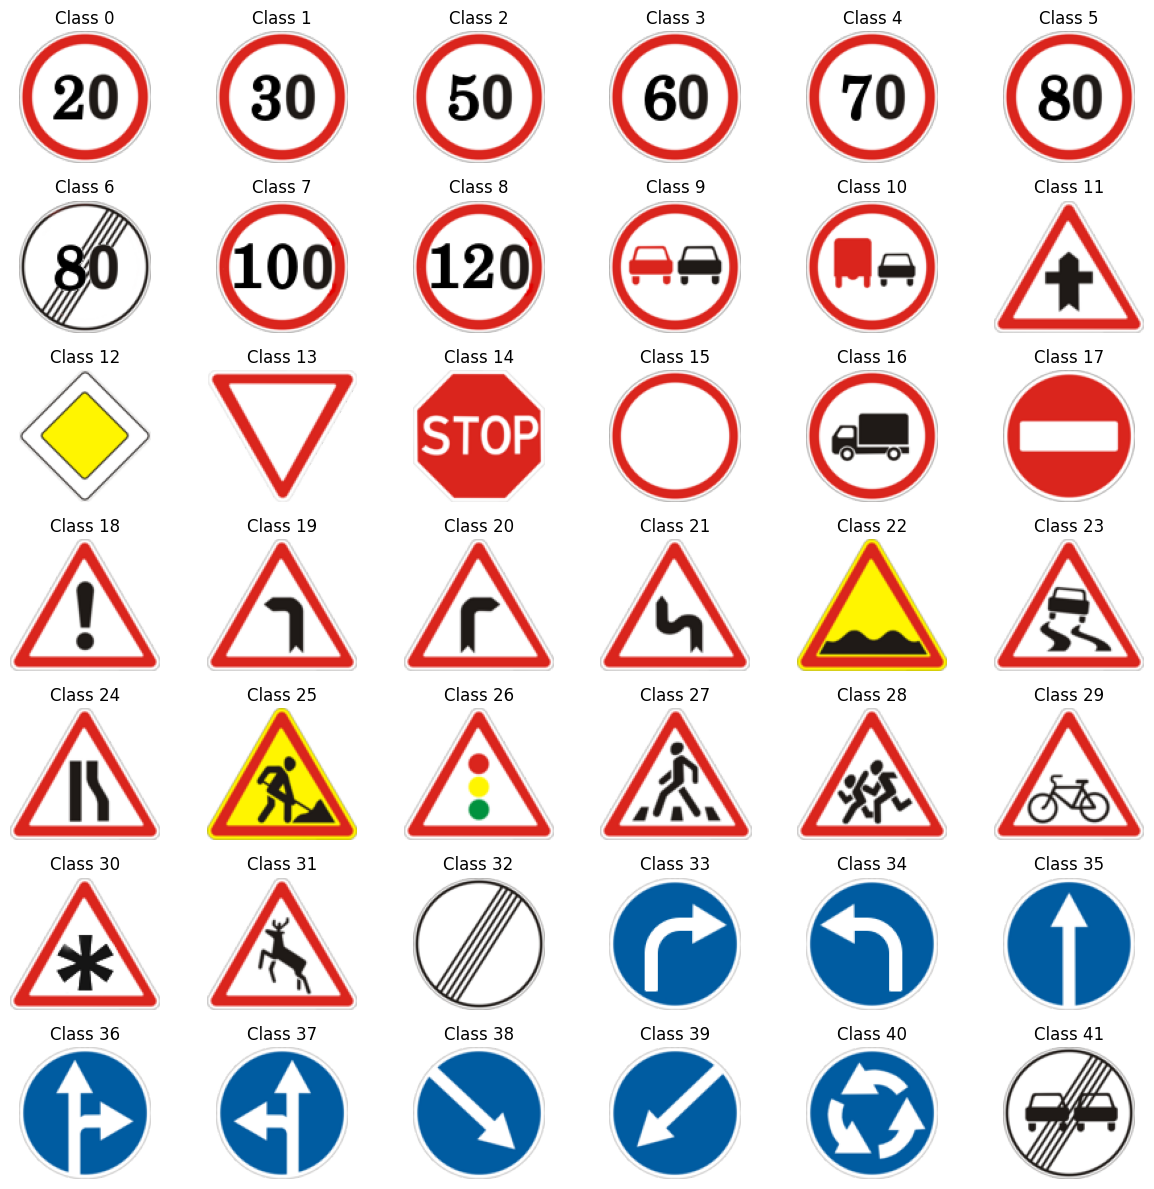

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Set dataset path (update this path to where your dataset is stored)
dataset_path = "/content/drive/MyDrive/archive"

# Load the dataset
df = pd.read_csv(os.path.join(dataset_path, "Train.csv"))
df_test = pd.read_csv(os.path.join(dataset_path, "Test.csv"))
meta = pd.read_csv(os.path.join(dataset_path, "Meta.csv"))

print("Training dataset:")
print(df.head())

print("\nTest dataset:")
print(df_test.head())

print("\nMeta dataset:")
print(meta.head())

# Show all 42 images in the meta dataset
meta_sorted = meta.sort_values(by="ClassId").reset_index(drop=True)

fig, axs = plt.subplots(7, 6, figsize=(12, 12))
for i in range(42):
    img_path = os.path.join(dataset_path, meta_sorted.iloc[i]["Path"])
    img = Image.open(img_path)
    axs[i // 6, i % 6].imshow(img)
    axs[i // 6, i % 6].axis("off")
    axs[i // 6, i % 6].set_title(f"Class {meta_sorted.iloc[i]['ClassId']}")

plt.tight_layout()
plt.show()


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Initialize lists for storing data and labels
data = []
labels = []

# Define the number of classes and correct folder path
classes = 43
base_path = "/content/drive/MyDrive/archive/Train"  # Corrected dataset path

# Retrieve images and their labels
for i in range(classes):
    path = os.path.join(base_path, str(i))  # Access each class folder

    if not os.path.exists(path):
        print(f"Warning: Folder {path} not found! Skipping...")
        continue

    images = os.listdir(path)
    print(f"Processing {len(images)} images in class {i}...")

    for img_name in images:
        try:
            img_path = os.path.join(path, img_name)  # Correct image path
            image = Image.open(img_path).convert("RGB")  # Ensure RGB format
            image = image.resize((30, 30))  # Resize image to 30*30
            image = np.array(image, dtype=np.float32) / 255.0  # Normalize pixel values

            data.append(image)  # Append image data
            labels.append(i)  # Append label (class index)

        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert lists into NumPy arrays
data = np.array(data)
labels = np.array(labels)

print("✅ Dataset loaded successfully!")
print(f"Total images: {data.shape[0]}, Image shape: {data.shape[1:]}")

# Save dataset for future use
np.save("data.npy", data)
np.save("labels.npy", labels)

print("✅ Data preprocessing completed and saved as .npy files!")

# -------------------------------
# Step 2: Load dataset and Split Data
# -------------------------------

# Load the saved dataset
data = np.load("data.npy")
labels = np.load("labels.npy")

# Checking data shape
print(f"Dataset shape: {data.shape}, Labels shape: {labels.shape}")

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

# Converting the labels into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print("✅ One-hot encoding completed!")


Processing 210 images in class 0...
Processing 2220 images in class 1...
Processing 2250 images in class 2...
Processing 1410 images in class 3...
Processing 1980 images in class 4...
Processing 1860 images in class 5...
Processing 420 images in class 6...
Processing 1440 images in class 7...
Processing 1410 images in class 8...
Processing 1470 images in class 9...
Processing 2010 images in class 10...
Processing 1320 images in class 11...
Processing 2100 images in class 12...
Processing 2160 images in class 13...
Processing 780 images in class 14...
Processing 630 images in class 15...
Processing 420 images in class 16...
Processing 1110 images in class 17...
Processing 1200 images in class 18...
Processing 210 images in class 19...
Processing 360 images in class 20...
Processing 330 images in class 21...
Processing 390 images in class 22...
Processing 510 images in class 23...
Processing 270 images in class 24...
Processing 1500 images in class 25...
Processing 600 images in class 26

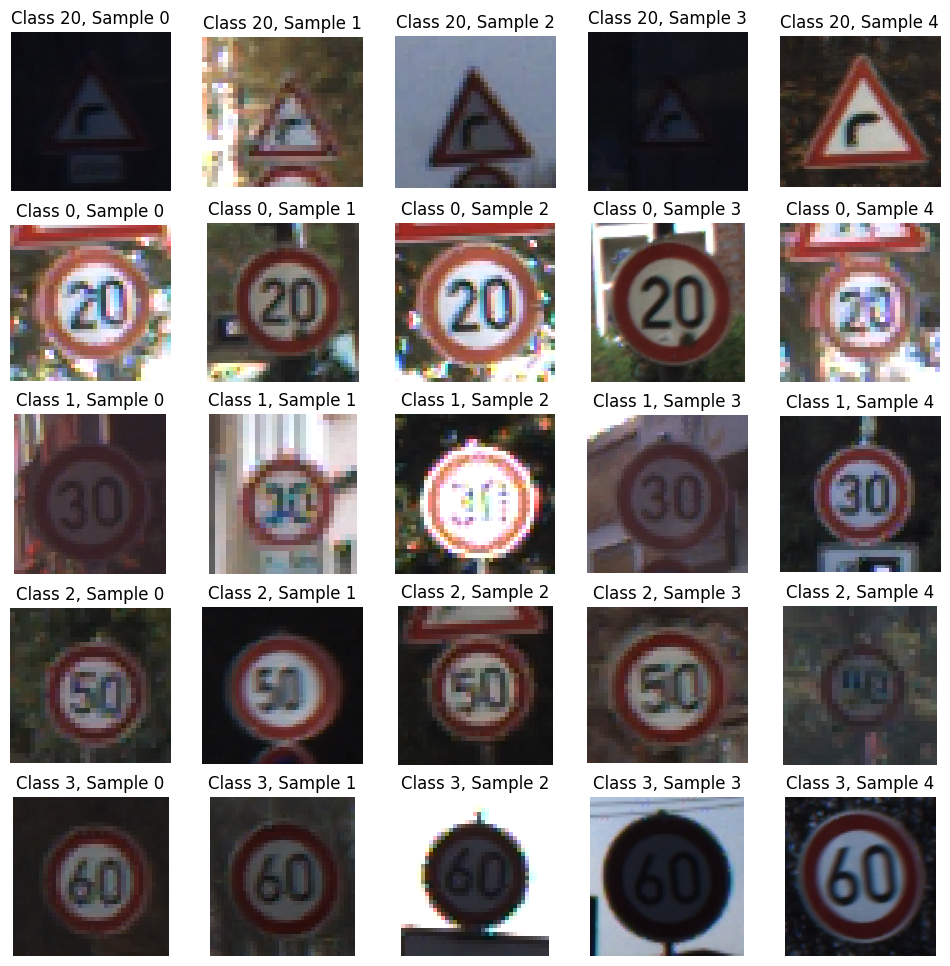

In [4]:
# Show first 5 images from the 5 folder in training dataset

unique_classes = df["ClassId"].unique()[:5]



fig, axs = plt.subplots(5, 5, figsize=(12, 12))

for i, class_id in enumerate(unique_classes):

    class_samples = df[df["ClassId"] == class_id].sample(5, random_state=1)

    for j in range(5):

        img_path = os.path.join(dataset_path, class_samples.iloc[j]["Path"])

        img = Image.open(img_path)

        axs[i, j].imshow(img)

        axs[i, j].axis("off")

        axs[i, j].set_title(f"Class {class_id}, Sample {j}")

plt.show()


In [5]:

# Split dataset into training, validation and test sets

df_train, df_val = train_test_split(df, test_size=0.15, random_state=1)



print("Total training dataset shape:", df.shape)

print("Training dataset shape:", df_train.shape)

print("Validation dataset shape:", df_val.shape)

print("Total test dataset shape:", df_test.shape)

Total training dataset shape: (39209, 8)
Training dataset shape: (33327, 8)
Validation dataset shape: (5882, 8)
Total test dataset shape: (12630, 8)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Building the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 15
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.3361 - loss: 2.4686 - val_accuracy: 0.9654 - val_loss: 0.1345
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.9231 - loss: 0.2679 - val_accuracy: 0.9851 - val_loss: 0.0550
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9573 - loss: 0.1459 - val_accuracy: 0.9911 - val_loss: 0.0315
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9687 - loss: 0.1088 - val_accuracy: 0.9916 - val_loss: 0.0315
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.9944 - val_loss: 0.0233
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.9762 - loss: 0.0744 - val_accuracy: 0.9936 - val_loss: 0.0253
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9950 - val_loss: 0.0215
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.9839 - loss: 0.0575 - 

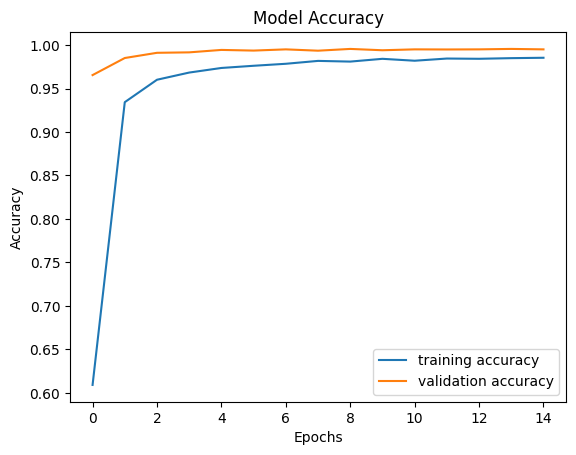

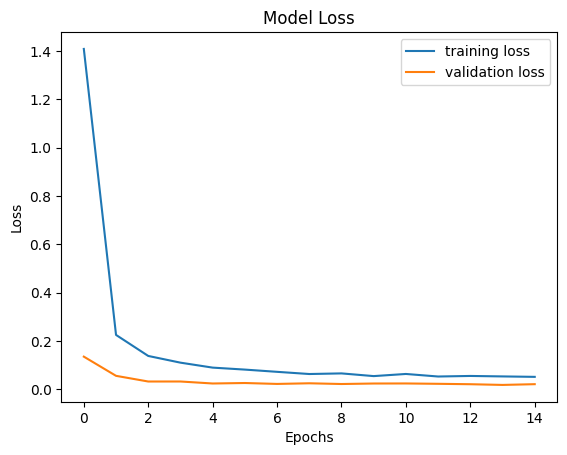

In [8]:
import matplotlib.pyplot as plt

# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9854
Final Validation Accuracy: 0.9950


In [15]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score
from PIL import Image
import numpy as np
import tensorflow as tf

# Importing the test dataset
y_test = pd.read_csv('/content/drive/MyDrive/archive/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
from tqdm import tqdm

with tf.device('/GPU:0'):
    for img in tqdm(imgs, desc="Loading images from Drive"):
        image = Image.open('/content/drive/MyDrive/archive/' + img)
        image = image.resize([30, 30])
        data.append(np.array(image))


X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

# Accuracy with the test data
print(accuracy_score(labels, pred))

Loading images from Drive: 100%|██████████| 12630/12630 [01:04<00:00, 194.42it/s]


395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
0.96215360253365


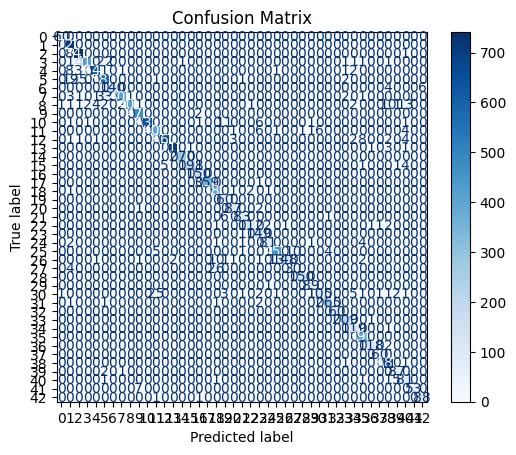

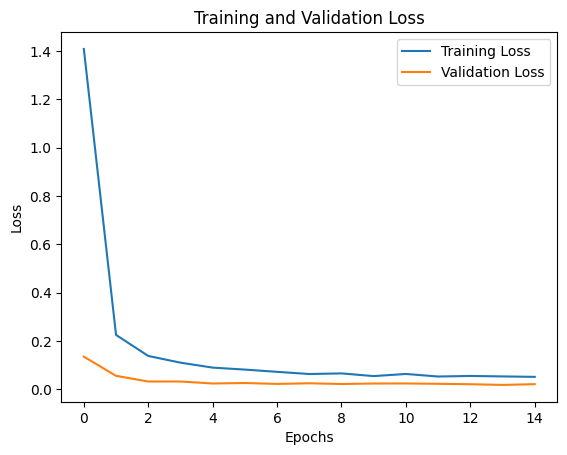

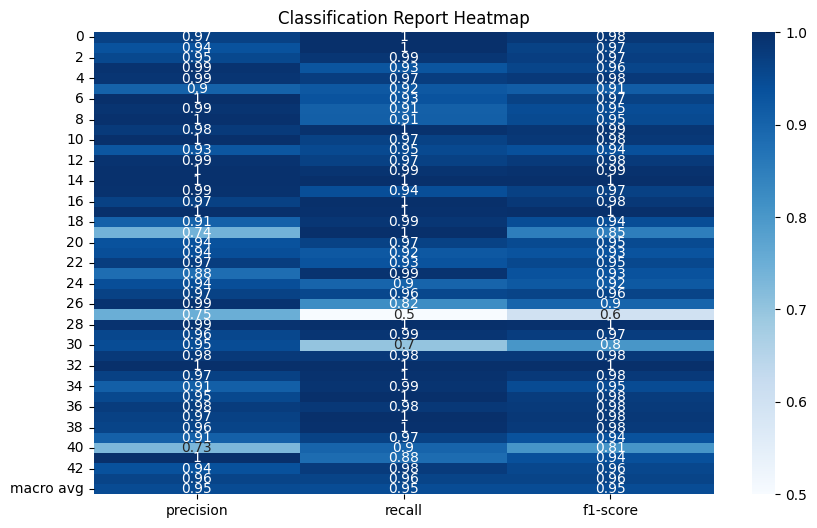

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns


# Assuming 'labels' are the true labels and 'pred' are the predicted labels
cm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

from sklearn.metrics import classification_report

# Assuming 'labels' are the true labels and 'pred' are the predicted labels
report = classification_report(labels, pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

In [16]:
model.save("/content/drive/MyDrive/Datasets/traffic_classifier.h5")


In [17]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/traffic_classifier.h5")


In [18]:
!pip install flask flask-ngrok tensorflow numpy pillow


In [19]:
!pip install flask-ngrok flask tensorflow pillow


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install pyngrok


In [22]:
from pyngrok import conf

conf.get_default().auth_token = "2vLR5DPAgnxMODW2BgJTRxBV05l_2sMNpi6xNvCUEQGP9yngv"


In [23]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import tensorflow as tf
import numpy as np
from PIL import Image
import io
import base64

# Load model
model_path = '/content/drive/MyDrive/Datasets/traffic_classifier.h5'
model = tf.keras.models.load_model(model_path)

# Class labels
class_labels = {
    0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
    9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at intersection", 12: "Priority road", 13: "Yield",
    14: "Stop", 15: "No vehicles", 16: "Vehicles over 3.5 metric tons prohibited",
    17: "No entry", 18: "General caution", 19: "Dangerous curve left",
    20: "Dangerous curve right", 21: "Double curve", 22: "Bumpy road",
    23: "Slippery road", 24: "Road narrows on the right", 25: "Road work",
    26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing",
    29: "Bicycles crossing", 30: "Beware of ice/snow", 31: "Wild animals crossing",
    32: "End of all speed and passing limits", 33: "Turn right ahead",
    34: "Turn left ahead", 35: "Ahead only", 36: "Go straight or right",
    37: "Go straight or left", 38: "Keep right", 39: "Keep left",
    40: "Roundabout mandatory", 41: "End of no passing",
    42: "End of no passing by vehicles over 3.5 metric tons"
}

app = Flask(__name__)

# HTML template
template = '''
<!doctype html>
<html lang="en">
<head>
    <title>Traffic Sign Classifier</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body { background-color: #f4f4f4; padding-top: 50px; }
        .container { max-width: 600px; background: white; padding: 30px; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0,0,0,0.1); }
        img { max-width: 100%; height: auto; }
    </style>
</head>
<body>
<div class="container text-center">
    <h2 class="mb-4">🚦 Traffic Sign Classifier</h2>
    {% if result %}
        <img src="data:image/png;base64,{{ image_data }}" class="img-fluid mb-3" alt="Uploaded Image">
        <h4 class="text-success">Prediction: {{ result }}</h4>
        <a href="/" class="btn btn-primary mt-3">🔙 Try Another</a>
    {% else %}
        <form method="post" action="/predict" enctype="multipart/form-data">
            <div class="mb-3">
                <input class="form-control" type="file" name="file" required>
            </div>
            <button type="submit" class="btn btn-success">🔍 Upload & Predict</button>
        </form>
    {% endif %}
</div>
</body>
</html>
'''

@app.route('/', methods=['GET'])
def index():
    return render_template_string(template)

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    image = Image.open(file).resize((30, 30))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 30, 30, 3)
    prediction = np.argmax(model.predict(img_array))
    result = class_labels.get(prediction, "Unknown Sign")

    # Convert image to base64
    buffer = io.BytesIO()
    image.save(buffer, format="PNG")
    img_str = base64.b64encode(buffer.getvalue()).decode()

    return render_template_string(template, result=result, image_data=img_str)

# Start Flask server and ngrok tunnel
port = 5000
public_url = ngrok.connect(port)
print(f"🚀 App running at: {public_url}")

app.run(port=port)


🚀 App running at: NgrokTunnel: "https://6ff0-34-16-154-91.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 07:40:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Apr/2025 07:41:00] "GET /favicon.ico HTTP/1.1" 404 -
